# Importing required dependencies





In [85]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors


This data set consists of:

	 1. 100,000 ratings (1-5) from 943 users on 1682 movies.
	 2. Each user has rated at least 20 movies.
     3. Simple demographic info for the users (age, gender, occupation, zip)

In [86]:
DATASET_LINK='/content/b477daa403d967185673a7bf5c12e2620b0ce0c434a0849da023139224d56ebb_ml-100k.zip'

# Unzip the file

In [87]:

!wget -nc http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -n ml-100k.zip

File ‘ml-100k.zip’ already there; not retrieving.

Archive:  ml-100k.zip


# Loding the u.data file, it contains:

> The full u data set, 100000 ratings by 943 users on 1682 items.
  Each user has rated at least 20 movies.  Users and items are
  numbered consecutively from 1.  The data is randomly
  ordered. This is a tab separated list of
	 user id | item id | rating | timestamp.
  The time stamps are unix seconds since 1/1/1970 UTC



In [88]:
column_names1 = ['user id','movie id','rating','timestamp']
dataset = pd.read_csv('/content/ml-100k/u.data', sep='\t',header=None,names=column_names1)
dataset

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


**1.The length of the dataset is 100k**

**2.Maximum length of movie id is 1682**

**3.Minimum length of movie id is 1**

In [89]:
len(dataset), max(dataset['movie id']),min(dataset['movie id'])


(100000, 1682, 1)

In [90]:
data = 'movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
column_names2 = data.split(' | ')
column_names2

['movie id',
 'movie title',
 'release date',
 'video release date',
 'IMDb URL',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

## World cloud of genre

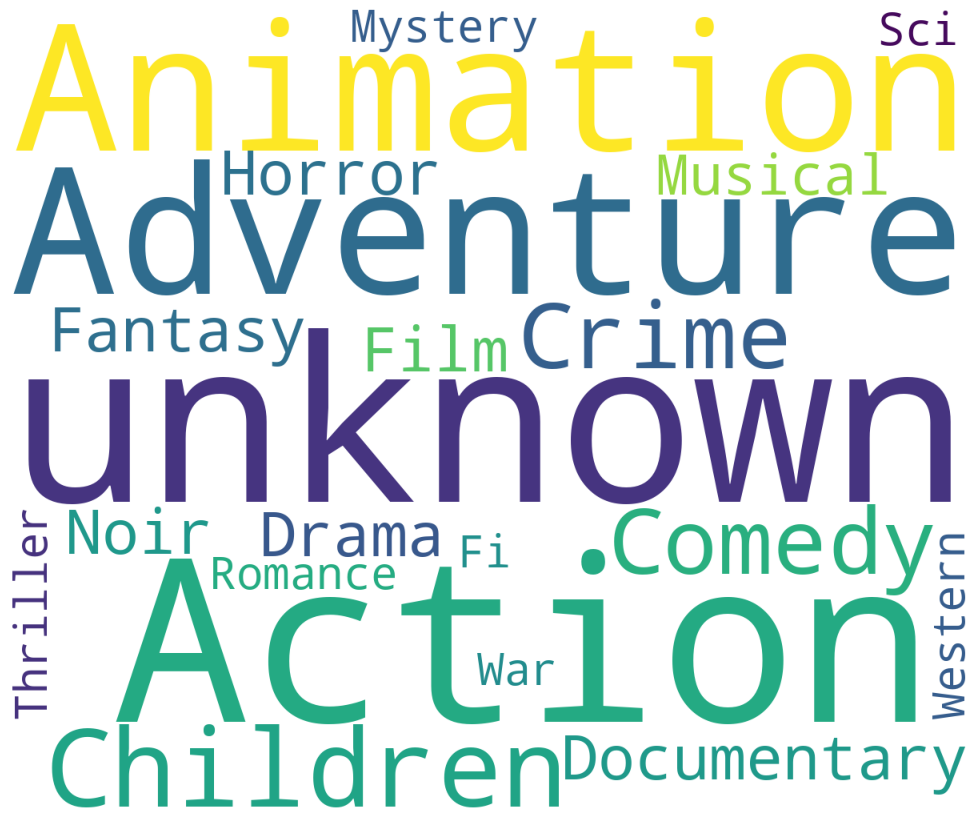

In [91]:
column_names3 = data.split(' | ')
exclude_words = ['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL']
column_names3 = [word for word in column_names3 if word not in exclude_words]
from wordcloud import WordCloud
import matplotlib.pyplot as plt
column_names_str = ' '.join(column_names3)
wordcloud = WordCloud(width=1200, height=1000,
                      background_color='white',
                      stopwords=None,
                      min_font_size=10).generate(column_names_str)
plt.figure(figsize=(12, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In this item_dataset have movie id, movie title, release date, video release date, IMDb URL, unknown, Action, Adventure, Animation, Children, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western. where 0 means that genre not exist in that movie and 1 means exist.

In [92]:
items_dataset = pd.read_csv('ml-100k/u.item', sep='|',header=None,names=column_names2,encoding='latin-1')
items_dataset

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Movie id and movie title**

In [93]:
movie_data = items_dataset[['movie id','movie title']]
movie_data

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


looking at length of original items_dataset and length of unique combination of rows in items_dataset after removing movie id column

In [94]:
len(items_dataset.groupby(by=column_names2[1:])),len(items_dataset)

(1664, 1682)

Merging the dataset and movie_data

In [95]:
merged_dataset = pd.merge(dataset, movie_data, how='inner', on='movie id')
merged_dataset

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In the refined_dataset, ratings are organized by user groups. For example, when displaying information for User ID 1, all movies watched by User ID 1 will be shown alongside their corresponding ratings.  

In [96]:
refined_dataset = merged_dataset.groupby(by=['user id','movie title'], as_index=False).agg({"rating":"mean"})
refined_dataset

,user id,movie title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0
...,...,...,...
99688,943,"Wizard of Oz, The (1939)",3.0
99689,943,Wolf (1994),2.0
99690,943,Wyatt Earp (1994),1.0
99691,943,Young Guns (1988),4.0


## Unique number of users and movies

In [97]:
num_users = len(refined_dataset['user id'].value_counts())
num_items = len(refined_dataset['movie title'].value_counts())
print('Unique number of users in the dataset: {}'.format(num_users))
print('Unique number of movies in the dataset: {}'.format(num_items))

Unique number of users in the dataset: 943
Unique number of movies in the dataset: 1664


In [98]:
rating_count_df = pd.DataFrame(refined_dataset.groupby(['rating']).size(), columns=['count'])
rating_count_df

,count
rating,
1.0,6083
1.5,3
2.0,11334
2.5,6
3.0,27060
3.5,19
4.0,34042
4.5,16
5.0,21130


From this graph we can see that number of 1.5,2.5,3.5,4.5 are compratively negligible

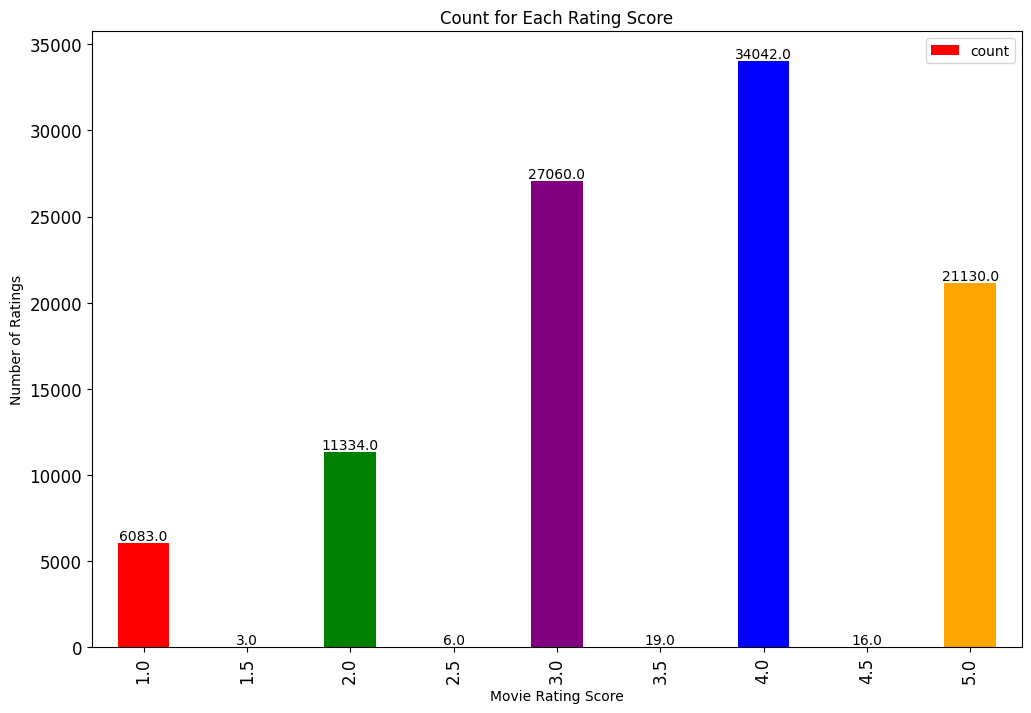

In [99]:
import matplotlib.pyplot as plt
colors = ['red', 'blue', 'green', 'orange', 'purple']
ax = rating_count_df.reset_index().plot(x='rating', y='count', kind='bar', color=colors,
                                       figsize=(12, 8), title='Count for Each Rating Score', fontsize=12)
ax.set_xlabel("Movie Rating Score")
ax.set_ylabel("Number of Ratings")
for index, row in rating_count_df.reset_index().iterrows():
    ax.text(index, row['count'], str(row['count']), ha='center', va='bottom')

plt.show()

## calculate the number of ratings for the individual movie

In [100]:
movies_count_df = pd.DataFrame(merged_dataset.groupby(['movie id', 'movie title']).size(), columns=['count'])
movies_count_df

,,count
movie id,movie title,
1,Toy Story (1995),452
2,GoldenEye (1995),131
3,Four Rooms (1995),90
4,Get Shorty (1995),209
5,Copycat (1995),86
...,...,...
1678,Mat' i syn (1997),1
1679,B. Monkey (1998),1
1680,Sliding Doors (1998),1


The distribution of ratings among movies often satisfies a property in real-world settings, which is referred to as the long-tail property. According to this property, only a small fraction of the items are rated frequently. Such items are referred to as popular items. The vast majority of items are rated rarely. This results in a highly skewed distribution of the underlying ratings.

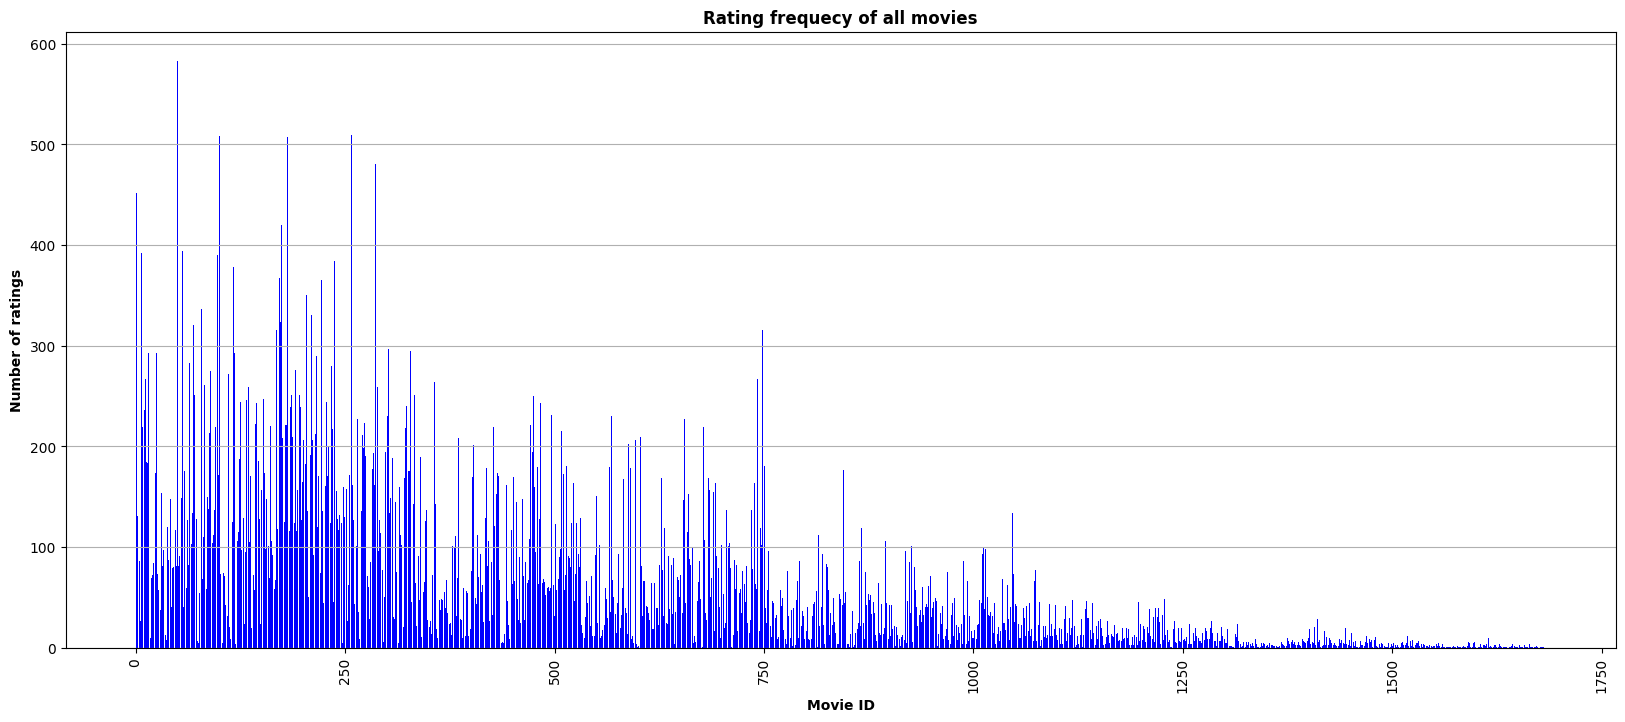

In [101]:
import matplotlib.pyplot as plt
movie_ids = movies_count_df.reset_index()['movie id']
counts = movies_count_df['count']
plt.figure(figsize=(20, 8))
plt.bar(movie_ids, counts, color='blue')

plt.title('Rating frequecy of all movies',fontweight='bold')
plt.xlabel('Movie ID',fontweight='bold')
plt.ylabel('Number of ratings',fontweight='bold')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.show()



# **User-based collaborative Recommender System**

## K-NN MODEL(K -Nearest Neighbour)
The K-NN algorithm works by finding the K nearest neighbors to a given data point based on a distance metric, such as Euclidean distance. The class or value of the data point is then determined by the majority vote or average of the K neighbors. This approach allows the algorithm to adapt to different patterns and make predictions based on the local structure of the data.



In [102]:
#create movie-user matrix
user_to_movie_df = refined_dataset.pivot(
    index='user id',
     columns='movie title',
      values='rating').fillna(0)
user_to_movie_df.head()

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0


A Scipy sparse matrix is a special type of matrix which is used for storing and manipulating large matrices that are predominantly filled with zeros.

In [103]:
# transform matrix to scipy sparse matrix
user_to_movie_sparse_df = csr_matrix(user_to_movie_df.values)
user_to_movie_sparse_df

<943x1664 sparse matrix of type '<class 'numpy.float64'>'
	with 99693 stored elements in Compressed Sparse Row format>

For the K-NN model use the cosine similarty metric to measure the similarty between the data points.This model can then be used to find similar users or items based on their ratings.

In [104]:

knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_to_movie_sparse_df)


NearestNeighbors(algorithm='brute', metric='cosine')

In [105]:
# Making a  function to find top n similar users of the given input user
def get_similar_users(user, n = 8):
# input to this function is the user and number of top similar users which we want.
  knn_input = np.asarray([user_to_movie_df.values[user-1]])
  distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n+1)
  print("Top",n,"users who are very much similar to the User-",user, "are: ")
  print(" ")
  for i in range(1,len(distances[0])):
    print(i,". User:", indices[0][i]+1, "separated by distance of",distances[0][i])
  return indices.flatten()[1:] + 1, distances.flatten()[1:]

## **Specify User id and Number of similar users**

In [106]:

from pprint import pprint
user_id = 700
print(" Few of movies seen by the User:")
pprint(list(refined_dataset[refined_dataset['user id'] == user_id]['movie title'])[:10])
similar_user_list, distance_list = get_similar_users(user_id,5)

 Few of movies seen by the User:
['Apocalypse Now (1979)',
 'Apollo 13 (1995)',
 'Die Hard (1988)',
 'E.T. the Extra-Terrestrial (1982)',
 'Fugitive, The (1993)',
 'Glory (1989)',
 'Groundhog Day (1993)',
 'Hoop Dreams (1994)',
 'Maverick (1994)',
 'Monty Python and the Holy Grail (1974)']
Top 5 users who are very much similar to the User- 700 are: 
 
1 . User: 575 separated by distance of 0.5667284343690233
2 . User: 679 separated by distance of 0.5885333847447412
3 . User: 41 separated by distance of 0.594197378128124
4 . User: 632 separated by distance of 0.6249602775982788
5 . User: 124 separated by distance of 0.6265284869145243


 **With the help of the KNN model built, we could get desired number of top similar users.**

**Now,I will have to pick the top movies to recommend to the users.**

**One way would be by taking the average of the existing ratings given by the similar users and picking the top 5 or 10 top movies to recommend to current user.**
>But we have a group of friends who have similar tastes in movies to us. Some of these friends are closer to us in terms of similarity, meaning they have almost identical tastes, while others are a bit farther away, meaning they have some differences in preferences.

>Now, if we want to decide what movie to watch, we might trust the opinions of our closer friends more because they're more like to us. So, instead of just taking the average of all our friends' ratings, we might give more weight to the ratings of our closer friends. This means their opinions will have a bigger impact on our decision compared to those of your more distant friends.

### similar user list and distance list

In [107]:
similar_user_list, distance_list

(array([575, 679,  41, 632, 124]),
 array([0.56672843, 0.58853338, 0.59419738, 0.62496028, 0.62652849]))

In [108]:

weightage_list = distance_list/np.sum(distance_list)
weightage_list

array([0.1888498 , 0.19611582, 0.19800323, 0.20825429, 0.20877686])

### Getting ratings of all movies by derived similar users

In [109]:

movie_rtngs_sim_users = user_to_movie_df.values[similar_user_list]
movie_rtngs_sim_users

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [110]:

movies_list = user_to_movie_df.columns
movies_list

Index([''Til There Was You (1997)', '1-900 (1994)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)',
       ...
       'Yankee Zulu (1994)', 'Year of the Horse (1997)', 'You So Crazy (1994)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Poisoner's Handbook, The (1995)',
       'Zeus and Roxanne (1997)', 'unknown',
       'Á köldum klaka (Cold Fever) (1994)'],
      dtype='object', name='movie title', length=1664)

In [111]:
print("Weightage list shape:", len(weightage_list.shape))
print("mov_rtngs_sim_users shape:", movie_rtngs_sim_users.shape)
print("Number of movies:", len(movies_list))

Weightage list shape: 1
mov_rtngs_sim_users shape: (5, 1664)
Number of movies: 1664


In [112]:
weightage_list = weightage_list[:,np.newaxis] + np.zeros(len(movies_list))
weightage_list.shape

(5, 1664)

In [113]:
new_rating_matrix = weightage_list*movie_rtngs_sim_users
mean_rating_list = new_rating_matrix.sum(axis =0)
mean_rating_list

array([0., 0., 0., ..., 0., 0., 0.])

### Define the recommendation movies function

In [114]:

from pprint import pprint
def recommend_movies(n):
  n = min(len(mean_rating_list),n)
  pprint(list(movies_list[np.argsort(mean_rating_list)[::-1][:n]]))

## **Top movies recommended on the basis of the similar users**

In [115]:
print("Movies recommended based on similar users are: ")
recommend_movies(10)

Movies recommended based on similar users are: 
['Star Wars (1977)',
 "Schindler's List (1993)",
 'Terminator, The (1984)',
 'Sound of Music, The (1965)',
 'Silence of the Lambs, The (1991)',
 'Toy Story (1995)',
 'Fugitive, The (1993)',
 'Liar Liar (1997)',
 'Indiana Jones and the Last Crusade (1989)',
 'Return of the Jedi (1983)']


This recommendation system have some drawback it also recommend the same movie which are already seen by the user previously.
And also a possibility of recommending that movie which are not seen by similar users.

**A function is defined below to eliminate movies that the current user has** **already viewed and those that none of the similar users have watched.**

In [116]:
def filtered_movie_recommendations(n):

  first_zero_index = np.where(mean_rating_list == 0)[0][-1]
  sortd_index = np.argsort(mean_rating_list)[::-1]
  sortd_index = sortd_index[:list(sortd_index).index(first_zero_index)]
  n = min(len(sortd_index),n)
  movies_watched = list(refined_dataset[refined_dataset['user id'] == user_id]['movie title'])
  filtered_movie_list = list(movies_list[sortd_index])
  count = 0
  final_movie_list = []
  for i in filtered_movie_list:
    if i not in movies_watched:
      count+=1
      final_movie_list.append(i)
    if count == n:
      break
  if count == 0:
    print("There are no movies left which are not seen by the input users and seen by similar users. May be increasing the number of similar users who are to be considered may give a chance of suggesting an unseen good movie.")
  else:
    pprint(final_movie_list)




### Filtered movie recommendation list

In [117]:
filtered_movie_recommendations(10)


['Terminator, The (1984)',
 'Sound of Music, The (1965)',
 'Toy Story (1995)',
 'Liar Liar (1997)',
 'Indiana Jones and the Last Crusade (1989)',
 'Back to the Future (1985)',
 'Jurassic Park (1993)',
 'Empire Strikes Back, The (1980)',
 'Jerry Maguire (1996)',
 'Leaving Las Vegas (1995)']


### **Now combining the all function and find the movie recommendation on the basis of user. Give the input user id , no of similar users and no of recommended movies**

In [118]:
from pprint import pprint

def recommender_system(user_id, n_similar_users, n_movies):

  print("Movie seen by the User:")
  pprint(list(refined_dataset[refined_dataset['user id'] == user_id]['movie title']))
  print("")
  def get_similar_users(user, n = 5):

    knn_input = np.asarray([user_to_movie_df.values[user-1]])

    distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n+1)

    print("Top",n,"users who are very much similar to the User-",user, "are: ")
    print(" ")

    for i in range(1,len(distances[0])):
      print(i,". User:", indices[0][i]+1, "separated by distance of",distances[0][i])
    print("")
    return indices.flatten()[1:] + 1, distances.flatten()[1:]


  def filtered_movie_recommendations(n = 10):

    first_zero_index = np.where(mean_rating_list == 0)[0][-1]
    sortd_index = np.argsort(mean_rating_list)[::-1]
    sortd_index = sortd_index[:list(sortd_index).index(first_zero_index)]
    n = min(len(sortd_index),n)
    movies_watched = list(refined_dataset[refined_dataset['user id'] == user_id]['movie title'])
    filtered_movie_list = list(movies_list[sortd_index])
    count = 0
    final_movie_list = []
    for i in filtered_movie_list:
      if i not in movies_watched:
        count+=1
        final_movie_list.append(i)
      if count == n:
        break
    if count == 0:
       print("There are no movies left which are not seen by the input users and seen by similar users. May be increasing the number of similar users who are to be considered may give a chance of suggesting an unseen good movie.")
    else:
      pprint(final_movie_list)

  similar_user_list, distance_list = get_similar_users(user_id,n_similar_users)
  weightage_list = distance_list/np.sum(distance_list)
  mov_rtngs_sim_users = user_to_movie_df.values[similar_user_list]
  movies_list = user_to_movie_df.columns
  weightage_list = weightage_list[:,np.newaxis] + np.zeros(len(movies_list))
  new_rating_matrix = weightage_list*mov_rtngs_sim_users
  mean_rating_list = new_rating_matrix.sum(axis =0)
  print("")
  print("Movies recommended based on similar users are: ")
  print("")
  filtered_movie_recommendations(n_movies)

### Giving the input and find the similar movie

In [119]:
print("Enter user id")
user_id= int(input())
print("number of similar users to be considered")
sim_users = int(input())
print("Enter number of movies to be recommended:")
n_movies = int(input())
recommender_system(user_id,sim_users,n_movies)

Enter user id
420
number of similar users to be considered
10
Enter number of movies to be recommended:
10
Movie seen by the User:
['Amistad (1997)',
 "Antonia's Line (1995)",
 'Ballad of Narayama, The (Narayama Bushiko) (1958)',
 'Big Night (1996)',
 'Burnt By the Sun (1994)',
 'Clockwork Orange, A (1971)',
 'Close Shave, A (1995)',
 'Cold Comfort Farm (1995)',
 'Diva (1981)',
 'Edge, The (1997)',
 'Emma (1996)',
 'English Patient, The (1996)',
 'Everyone Says I Love You (1996)',
 'Fargo (1996)',
 'Gattaca (1997)',
 'Godfather, The (1972)',
 'Henry V (1989)',
 'In & Out (1997)',
 'L.A. Confidential (1997)',
 'Lone Star (1996)',
 'Maltese Falcon, The (1941)',
 'People vs. Larry Flynt, The (1996)',
 'Philadelphia Story, The (1940)',
 'Postino, Il (1994)',
 'Princess Bride, The (1987)',
 'Rear Window (1954)',
 'Remains of the Day, The (1993)',
 'Scream (1996)',
 'Secrets & Lies (1996)',
 'Sense and Sensibility (1995)',
 'Seven Years in Tibet (1997)',
 'Shall We Dance? (1996)',
 'Thin Man

# **Item-based Recommendation System**

In [120]:
movie_to_user_df = refined_dataset.pivot(
     index='movie title',
   columns='user id',
      values='rating').fillna(0)

movie_to_user_df

user id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-900 (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),5.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187 (1997),0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
"Young Poisoner's Handbook, The (1995)",0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zeus and Roxanne (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



**We'll train a KNN model to discover closely related movies based on the input movie. Using this model, we'll recommend the top movies that closely match the given one, ensuring better alignment with the user's preferences**

In [121]:
# transform matrix to scipy sparse matrix
movie_to_user_sparse_df = csr_matrix(movie_to_user_df.values)
movie_to_user_sparse_df

<1664x943 sparse matrix of type '<class 'numpy.float64'>'
	with 99693 stored elements in Compressed Sparse Row format>

In [122]:
movies_list = list(movie_to_user_df.index)
movies_list[:12]

["'Til There Was You (1997)",
 '1-900 (1994)',
 '101 Dalmatians (1996)',
 '12 Angry Men (1957)',
 '187 (1997)',
 '2 Days in the Valley (1996)',
 '20,000 Leagues Under the Sea (1954)',
 '2001: A Space Odyssey (1968)',
 '3 Ninjas: High Noon At Mega Mountain (1998)',
 '39 Steps, The (1935)',
 '8 1/2 (1963)',
 '8 Heads in a Duffel Bag (1997)']

In [123]:

movie_dict = {movie : index for index, movie in enumerate(movies_list)}
print(movie_dict)

{"'Til There Was You (1997)": 0, '1-900 (1994)': 1, '101 Dalmatians (1996)': 2, '12 Angry Men (1957)': 3, '187 (1997)': 4, '2 Days in the Valley (1996)': 5, '20,000 Leagues Under the Sea (1954)': 6, '2001: A Space Odyssey (1968)': 7, '3 Ninjas: High Noon At Mega Mountain (1998)': 8, '39 Steps, The (1935)': 9, '8 1/2 (1963)': 10, '8 Heads in a Duffel Bag (1997)': 11, '8 Seconds (1994)': 12, 'A Chef in Love (1996)': 13, 'Above the Rim (1994)': 14, 'Absolute Power (1997)': 15, 'Abyss, The (1989)': 16, 'Ace Ventura: Pet Detective (1994)': 17, 'Ace Ventura: When Nature Calls (1995)': 18, 'Across the Sea of Time (1995)': 19, 'Addams Family Values (1993)': 20, 'Addicted to Love (1997)': 21, 'Addiction, The (1995)': 22, 'Adventures of Pinocchio, The (1996)': 23, 'Adventures of Priscilla, Queen of the Desert, The (1994)': 24, 'Adventures of Robin Hood, The (1938)': 25, 'Affair to Remember, An (1957)': 26, 'African Queen, The (1951)': 27, 'Afterglow (1997)': 28, 'Age of Innocence, The (1993)': 2

In [124]:

case_insensitive_movies_list = [i.lower() for i in movies_list]

**Fitting the K-NN model**

In [125]:
knn_movie_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_movie_model.fit(movie_to_user_sparse_df)

NearestNeighbors(algorithm='brute', metric='cosine')

### make the function for the getting the similar movies by using the knn model

In [126]:
def get_similar_movies(movie, n = 10):
  index = movie_dict[movie]
  knn_input = np.asarray([movie_to_user_df.values[index]])
  n = min(len(movies_list)-1,n)
  distances, indices = knn_movie_model.kneighbors(knn_input, n_neighbors=n+1)

  print("Top",n,"movies which are very much similar to the Movie-",movie, "are: ")
  print(" ")
  for i in range(1,len(distances[0])):
    print(movies_list[indices[0][i]])

**Defining a function which outputs movie names as suggestion when the user mis spells the movie name. User might have intended to type any of these movie names.**

In [128]:
def get_possible_movies(movie):

    temp = ''
    possible_movies = case_insensitive_movies_list.copy()
    for i in movie :
      out = []
      temp += i
      for j in possible_movies:
        if temp in j:
          out.append(j)
      if len(out) == 0:
          return possible_movies
      out.sort()
      possible_movies = out.copy()

    return possible_movies

**Recommends similar movies to the input movie if the movie name is valid**

In [129]:
class invalid(Exception):
    pass

def spell_correction():

    try:

      movie_name = input("Enter the Movie name: ")
      movie_name_lower = movie_name.lower()
      if movie_name_lower not in case_insensitive_movies_list :
        raise invalid
      else :
        num_recom = int(input("Enter Number of movie recommendations needed: "))
        get_similar_movies(movies_list[case_insensitive_movies_list.index(movie_name_lower)],num_recom)

    except invalid:

      possible_movies = get_possible_movies(movie_name_lower)

      if len(possible_movies) == len(movies_list) :
        print("Movie name entered is does not exist in the list ")
      else :
        indices = [case_insensitive_movies_list.index(i) for i in possible_movies]
        print("Entered Movie name is not matching with any movie from the dataset . Please check the below suggestions :\n",[movies_list[i] for i in indices])
        spell_correction()

In [130]:
spell_correction()

Enter the Movie name: Jurasic 
Entered Movie name is not matching with any movie from the dataset . Please check the below suggestions :
 ['Jurassic Park (1993)', 'Lost World: Jurassic Park, The (1997)']
Enter the Movie name: Jurassic Park (1993)
Enter Number of movie recommendations needed: 10
Top 10 movies which are very much similar to the Movie- Jurassic Park (1993) are: 
 
Top Gun (1986)
Speed (1994)
Raiders of the Lost Ark (1981)
Empire Strikes Back, The (1980)
Indiana Jones and the Last Crusade (1989)
True Lies (1994)
Back to the Future (1985)
Star Trek: The Wrath of Khan (1982)
Batman (1989)
Terminator, The (1984)


## **Knowledge Based Recommendation System**

### **u.info -- The number of users, items, and ratings in the u data set.**


In [131]:
overall_stats = pd.read_csv('ml-100k/u.info', header=None)
print("details of users, items and ratings involved in the loaded movielens dataset: ",list(overall_stats[0]))

details of users, items and ratings involved in the loaded movielens dataset:  ['943 users', '1682 items', '100000 ratings']


### Statical visualization of the dataset

In [132]:
merged_dataset.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


## **Data Visualization & Recommendations through Data Analysis for a new user (Content-based & Popularity based Recommender system)**

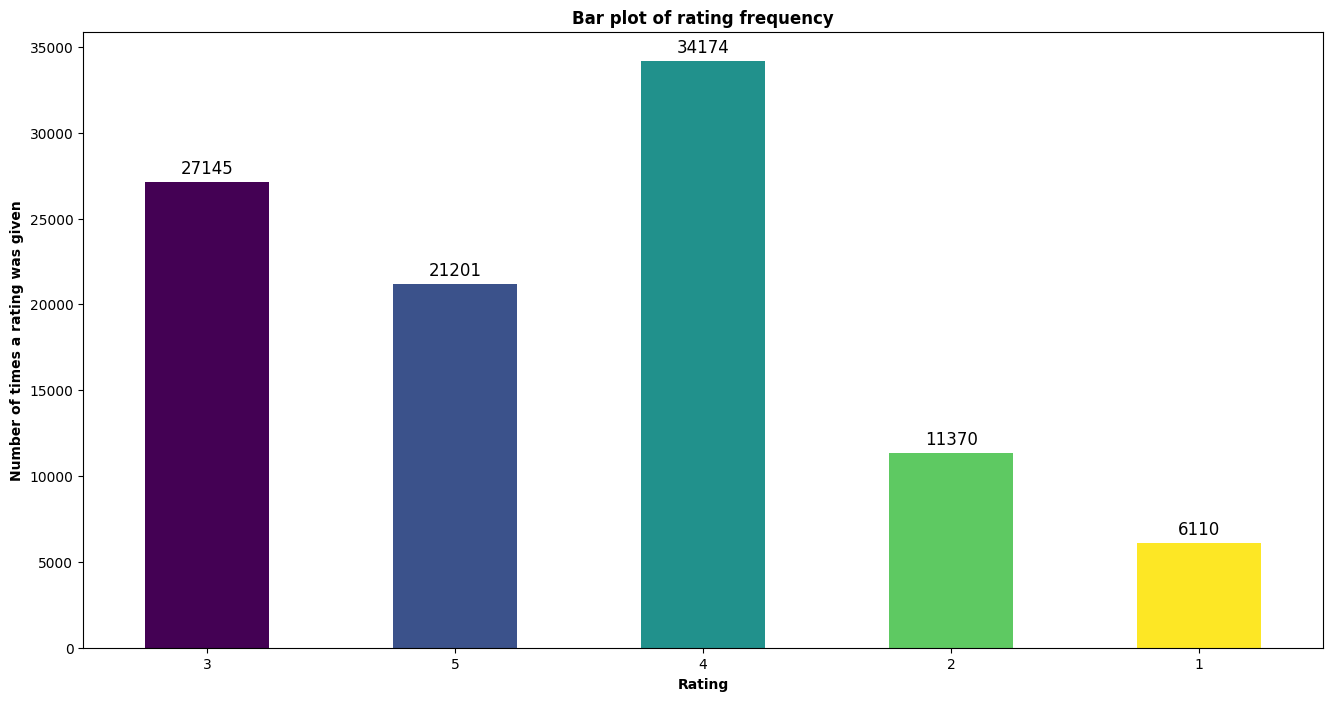

In [133]:
import matplotlib.pyplot as plt
import numpy as np
rating_counts = merged_dataset['rating'].value_counts(sort=False)
colors = plt.cm.viridis(np.linspace(0, 1, len(rating_counts)))
ax = rating_counts.plot(kind='bar', figsize=(16, 8), rot=0, color=colors)
plt.title('Bar plot of rating frequency',fontweight='bold')
plt.xlabel('Rating',fontweight='bold')
plt.ylabel('Number of times a rating was given',fontweight='bold')
for i, label in enumerate(rating_counts):
    plt.text(x=i, y=label + 500, s=label, ha='center', fontsize=12)
plt.show()


### From the graph we observe that more rating lie between 3 to 5 where more rating have 4

### **Average rating of individual movie rating**

In [134]:
avg_highly_rated_movies = merged_dataset.groupby(['movie title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
avg_highly_rated_movies = avg_highly_rated_movies.to_frame()
avg_highly_rated_movies.head(25)

,rating
movie title,
They Made Me a Criminal (1939),5.000000
Marlene Dietrich: Shadow and Light (1996),5.000000
"Saint of Fort Washington, The (1993)",5.000000
Someone Else's America (1995),5.000000
Star Kid (1997),5.000000
"Great Day in Harlem, A (1994)",5.000000
Aiqing wansui (1994),5.000000
Santa with Muscles (1996),5.000000
Prefontaine (1997),5.000000


In [135]:
print("number of movies with 5 star rating on average: ",len(avg_highly_rated_movies[avg_highly_rated_movies['rating'] == 5.0]))
print("number of movies with above 4 star and below 5 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 4.0) & (avg_highly_rated_movies['rating'] < 5.0)]))
print("number of movies with above 3 star and below 4 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 3.0) & (avg_highly_rated_movies['rating'] < 4.0)]))
print("number of movies with above 2 star and below 3 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 2.0) & (avg_highly_rated_movies['rating'] < 3.0)]))
print("number of movies with above 1 star and below 2 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 1.0) & (avg_highly_rated_movies['rating'] < 2.0)]))
print("number of movies with below 1 star rating on average: ", len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] < 1.0)]))

number of movies with 5 star rating on average:  10
number of movies with above 4 star and below 5 star rating on average:  163
number of movies with above 3 star and below 4 star rating on average:  871
number of movies with above 2 star and below 3 star rating on average:  492
number of movies with above 1 star and below 2 star rating on average:  128
number of movies with below 1 star rating on average:  0


From the above data observed that

rating 5 is equal to 10.
rating between 4 and 5 is 163.
rating between 3 and 4 is 871.
rating between 2 and 3 is 492.
rating between 1 and  2 is 128.
rating between 1 and 0 is 0.

## **Pie chart of split of movies count based on their overall average rating in percentage**

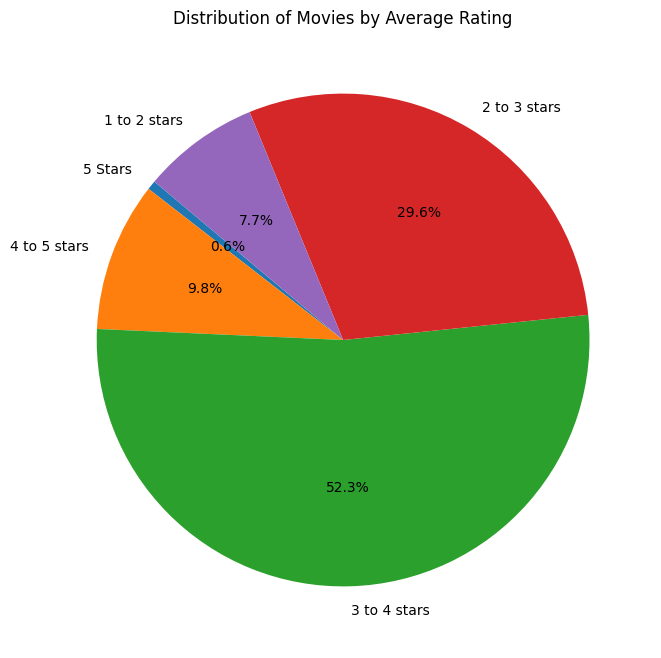

In [136]:
import matplotlib.pyplot as plt
# Calculate the counts of movies falling into different rating categories
count_5_stars = len(avg_highly_rated_movies[avg_highly_rated_movies['rating'] == 5.0])
count_above_4_stars = len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 4.0) & (avg_highly_rated_movies['rating'] < 5.0)])
count_above_3_stars = len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 3.0) & (avg_highly_rated_movies['rating'] < 4.0)])
count_above_2_stars = len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 2.0) & (avg_highly_rated_movies['rating'] < 3.0)])
count_above_1_stars = len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 1.0) & (avg_highly_rated_movies['rating'] < 2.0)])
count_below_1_star = len(avg_highly_rated_movies[avg_highly_rated_movies['rating'] < 1.0])
# Create a list of counts and corresponding labels
counts = [count_5_stars, count_above_4_stars, count_above_3_stars, count_above_2_stars, count_above_1_stars]
labels = ['5 Stars', '4 to 5 stars', '3 to 4 stars', '2 to 3 stars', '1 to 2 stars']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Movies by Average Rating')
plt.show()




## **Recommendation to new user based on the top ratings of movies**

In [137]:
avg_highly_rated_movies.reset_index(level=0, inplace=True)
avg_highly_rated_movies.columns = ['movie title', 'avg rating']
avg_highly_rated_movies.head(10)

,movie title,avg rating
0,They Made Me a Criminal (1939),5.0
1,Marlene Dietrich: Shadow and Light (1996),5.0
2,"Saint of Fort Washington, The (1993)",5.0
3,Someone Else's America (1995),5.0
4,Star Kid (1997),5.0
5,"Great Day in Harlem, A (1994)",5.0
6,Aiqing wansui (1994),5.0
7,Santa with Muscles (1996),5.0
8,Prefontaine (1997),5.0
9,Entertaining Angels: The Dorothy Day Story (1996),5.0


But drawback of this recommendation is main intially when we seen above there have some movie which have rating 5 star but users have very few so by raitng recommendation is not much correct.

In [138]:
merged_dataset.groupby(['movie title']).agg({"rating":"sum"})['rating'].sort_values(ascending=False)

movie title
Star Wars (1977)                             2541
Fargo (1996)                                 2111
Return of the Jedi (1983)                    2032
Contact (1997)                               1936
Raiders of the Lost Ark (1981)               1786
                                             ... 
T-Men (1947)                                    1
JLG/JLG - autoportrait de décembre (1994)       1
Careful (1992)                                  1
Invitation, The (Zaproszenie) (1986)            1
Hedd Wyn (1992)                                 1
Name: rating, Length: 1664, dtype: int64

Text(0, 0.5, 'Number of times a user watched that movie')

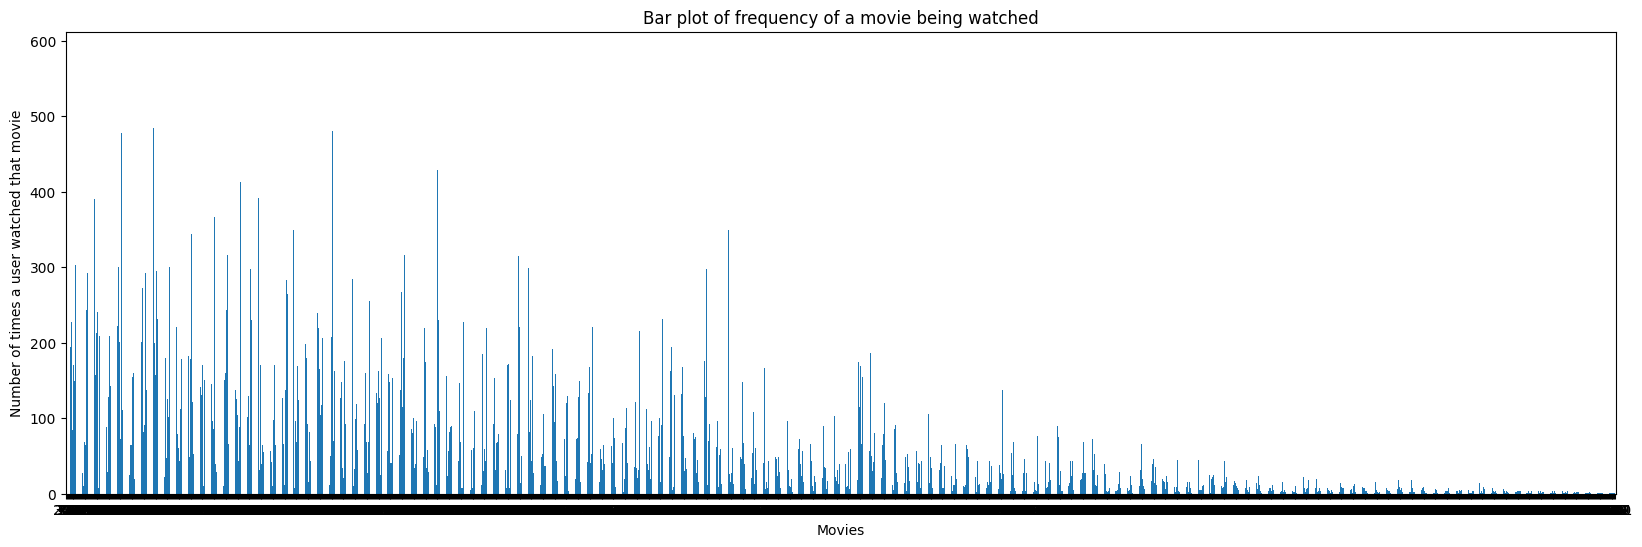

In [139]:
merged_dataset['movie id'].value_counts(sort=False).plot(kind='bar' ,figsize=(20,6), use_index = True, rot=0)
plt.title('Bar plot of frequency of a movie being watched')
plt.xlabel('Movies')
plt.ylabel('Number of times a user watched that movie')

## **find the number of movies in the different range of the viewers**

In [140]:

popular_movies = merged_dataset.groupby(['movie title']).agg({"rating":"count"})['rating'].sort_values(ascending=False)
popular_movies = popular_movies.to_frame()
popular_movies.reset_index(level=0, inplace=True)
popular_movies.columns = ['movie title', 'Number of Users watched']
print("Number of popular movies with more than 500 viewers: ",len(popular_movies[popular_movies['Number of Users watched'] >= 500]))
print("Number of popular movies with more than 400 and less than 500 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 400) & (popular_movies['Number of Users watched'] < 500)]))
print("Number of popular movies with more than 300 and less than 400 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 300) & (popular_movies['Number of Users watched'] < 400)]))
print("Number of popular movies with more than 200 and less than 300 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 200) & (popular_movies['Number of Users watched'] < 300)]))
print("Number of popular movies with more than 100 and less than 200 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 100) & (popular_movies['Number of Users watched'] < 200)]))
print("Number of popular movies with less than 100 viewers: ", len(popular_movies[(popular_movies['Number of Users watched'] < 100)]))



Number of popular movies with more than 500 viewers:  4
Number of popular movies with more than 400 and less than 500 viewers:  8
Number of popular movies with more than 300 and less than 400 viewers:  22
Number of popular movies with more than 200 and less than 300 viewers:  84
Number of popular movies with more than 100 and less than 200 viewers:  220
Number of popular movies with less than 100 viewers:  1326


### **Pie chart of viewers amd number of movies**

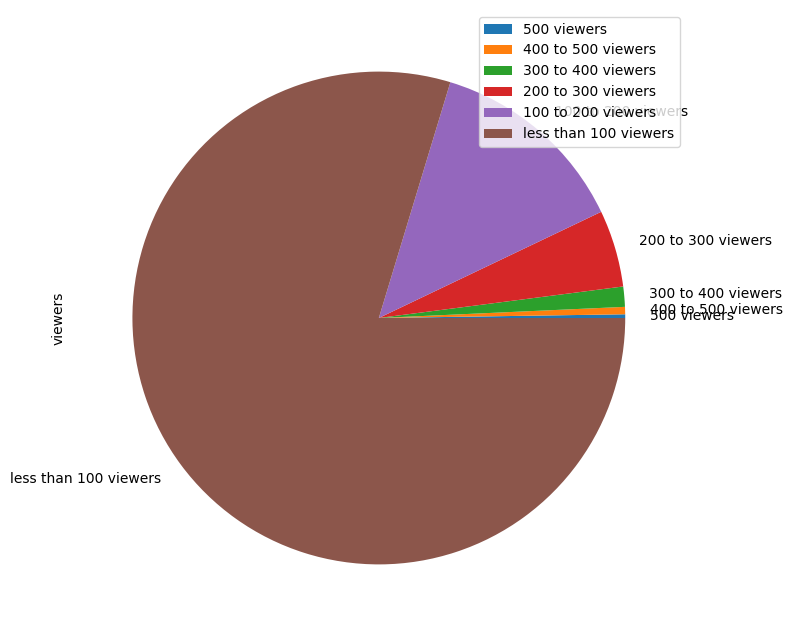

In [141]:
df = pd.DataFrame({'viewers': [4, 8, 22, 84, 220, 1326]},
                  index=['500 viewers', '400 to 500 viewers', '300 to 400 viewers', '200 to 300 viewers', '100 to 200 viewers', 'less than 100 viewers'])
plot = df.plot.pie(y='viewers', figsize=(8, 8))

## **Recommendation to user  based on Popularity**
where we take the threshold of 450 viewers or greater for the top movies

In [142]:

popular_movies[popular_movies['Number of Users watched'] >= 450]

,movie title,Number of Users watched
0,Star Wars (1977),583
1,Contact (1997),509
2,Fargo (1996),508
3,Return of the Jedi (1983),507
4,Liar Liar (1997),485
5,"English Patient, The (1996)",481
6,Scream (1996),478
7,Toy Story (1995),452


In [143]:
highly_rated_popular_movies = pd.merge(avg_highly_rated_movies, popular_movies, how = 'inner', on='movie title')
highly_rated_popular_movies.head(10)

,movie title,avg rating,Number of Users watched
0,They Made Me a Criminal (1939),5.0,1
1,Marlene Dietrich: Shadow and Light (1996),5.0,1
2,"Saint of Fort Washington, The (1993)",5.0,2
3,Someone Else's America (1995),5.0,1
4,Star Kid (1997),5.0,3
5,"Great Day in Harlem, A (1994)",5.0,1
6,Aiqing wansui (1994),5.0,1
7,Santa with Muscles (1996),5.0,2
8,Prefontaine (1997),5.0,3
9,Entertaining Angels: The Dorothy Day Story (1996),5.0,1


But there are some drawback of this recommendation may be some movie which have number of users watching more but rating is very low like 2 or 3 then this is bad recommendation.

Here take the threshold where find that type of movie which have number of user watching is greater than 450. So seen that 8 movies which is pass this criteria.

In [144]:
highly_rated_popular_movies[highly_rated_popular_movies['Number of Users watched']>450]

,movie title,avg rating,Number of Users watched
23,Star Wars (1977),4.358491,583
64,Fargo (1996),4.155512,508
129,Return of the Jedi (1983),4.007890,507
236,Toy Story (1995),3.878319,452
292,Contact (1997),3.803536,509
412,"English Patient, The (1996)",3.656965,481
597,Scream (1996),3.441423,478
837,Liar Liar (1997),3.156701,485


Then further analyze for the greater than 450 number of users and avg rating is also greater and equal to 4. So from this data seen that 3 movie only pass this crieteria so from this decide that these three movie is popular and also rating based good.If recommended these movie to user then mostly good for the user.

In [145]:
highly_rated_popular_movies[(highly_rated_popular_movies['Number of Users watched']>450) & (highly_rated_popular_movies['avg rating']>=4)]



,movie title,avg rating,Number of Users watched
23,Star Wars (1977),4.358491,583
64,Fargo (1996),4.155512,508
129,Return of the Jedi (1983),4.007890,507


## **Recommendation based on popularity and ratings**

In [146]:
highly_rated_popular_movies[(highly_rated_popular_movies['Number of Users watched']>350) & (highly_rated_popular_movies['avg rating']>=4.0)]


,movie title,avg rating,Number of Users watched
23,Star Wars (1977),4.358491,583
32,"Silence of the Lambs, The (1991)",4.289744,390
34,"Godfather, The (1972)",4.283293,413
40,Raiders of the Lost Ark (1981),4.252381,420
49,"Empire Strikes Back, The (1980)",4.204360,367
64,Fargo (1996),4.155512,508
101,Pulp Fiction (1994),4.060914,394
129,Return of the Jedi (1983),4.007890,507


# **Recommendations based on Movie Genre to a New User**

In [147]:
movie_genre_list = column_names2[-19:]
movie_genre_list

['unknown',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

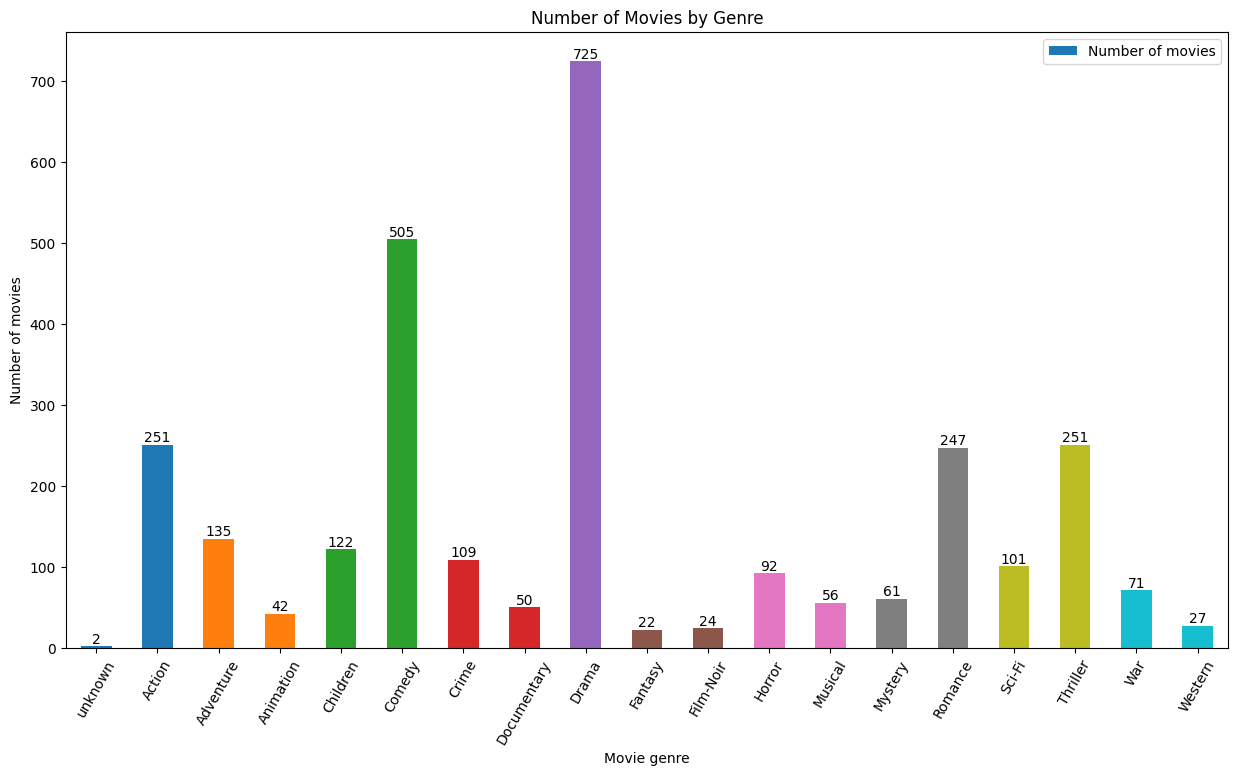

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
num_bars = len(movie_genre_list)
colors = plt.cm.tab10(np.linspace(0, 1, num_bars))

count = []
for i in movie_genre_list:
    genre_based_movies = items_dataset[['movie id', 'movie title', i]]
    genre_based_movies = genre_based_movies[genre_based_movies[i] == 1]
    count.append(len(genre_based_movies))

df = pd.DataFrame({'Movie genre': movie_genre_list, 'Number of movies': count})
ax = df.plot.bar(x='Movie genre', y='Number of movies', rot=60, figsize=(15, 8), color=colors)
for i, count in enumerate(df['Number of movies']):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.xlabel('Movie genre')
plt.ylabel('Number of movies')
plt.title('Number of Movies by Genre')
plt.show()


**We can see that most of the movies belong to movie genre : Drama followed by Comedy then Action, Romance and Thriller**

In [149]:
def star_based_visualization(dataframe):
    ratings = dataframe['rating'].value_counts(sort=False)
    ratings.plot(kind='bar', figsize=(12,6), use_index=True, rot=0, color=plt.cm.cool(np.linspace(0, 1, len(ratings))))
    plt.title('Bar plot of rating frequency')
    plt.xlabel('Rating')
    plt.ylabel('Number of times a rating was given')
    plt.show()
    print("Total number of users watched this Genre: ", len(dataframe))
    print("  ")


**This function takes a genre as input, filters movies of that genre from the dataset, and merges them with user ratings. It then visualizes the ratings distribution, identifies top-rated and popular movies in the genre, and recommends highly rated popular movies by iteratively adjusting thresholds for minimum viewership and rating.If number of movies is less than 11 then adjust threshold iteratively.**

In [150]:
def recommendations_genre(genre):
    x = genre
    print("****************************     ****** GENRE: ", x, " ******     ******************************")
    print("    ")
    genre_based_movies = items_dataset[['movie id', 'movie title', x]]
    genre_based_movies = genre_based_movies[genre_based_movies[x] == 1]
    merged_genre_movies = pd.merge(dataset, genre_based_movies, how='inner', on='movie id')

    star_based_visualization(merged_genre_movies)

    high_rated_movies = merged_genre_movies.groupby(['movie title']).agg({"rating": "mean"})['rating'].sort_values(ascending=False)
    high_rated_movies = high_rated_movies.to_frame()
    print("These are the top movies that can be naviely suggested to the new users for the requested movie genre:", x, ". Recommendations based on top average ratings.")
    print(high_rated_movies.head(10))
    print("****************************     ******************************     ******************************")

    popular_movies_ingenre = merged_genre_movies.groupby(['movie title']).agg({"rating": "count"})['rating'].sort_values(ascending=False)
    popular_movies_ingenre = popular_movies_ingenre.to_frame()
    popular_movies_ingenre.reset_index(level=0, inplace=True)
    popular_movies_ingenre.columns = ['movie title', 'Number of Users watched']
    print("These are the most popular movies which can be recommended to a new user in", x, "genre. Recommendations based on Popularity")
    print(popular_movies_ingenre.sort_values('Number of Users watched', ascending=False).head(10))
    print("****************************     ******************************     ******************************")

    highly_rated_popular_movies = pd.merge(high_rated_movies, popular_movies_ingenre, how='inner', on='movie title')
    viewer_limit = 350
    ratings_limit = 4.0
    count = 0
    check = 0
    while viewer_limit > 0 and ratings_limit > 0:
        s = highly_rated_popular_movies[(highly_rated_popular_movies['Number of Users watched'] > viewer_limit) & (highly_rated_popular_movies['rating'] >= ratings_limit)]
        if len(s) < 11:
            if check == 0:
                viewer_limit -= 50
                check = 1
            else:
                ratings_limit -= 0.5
                check = 0
        else:
            break

    print("These movies are the best to suggest to a new user within their requested genre as they are popular and well-rated by the users who already watched them.")
    print("These have a rating more than ", ratings_limit, " with at least ", viewer_limit, " viewers.")

    print("**Recommendations based popularity and rating. These are top-rated popular movies**")
    print(s)
    print("****************************     ******************************     ******************************")
    print("                             ")
    print("                             ")


Enter the genre: Drama
****************************     ****** GENRE:  Drama  ******     ******************************
    


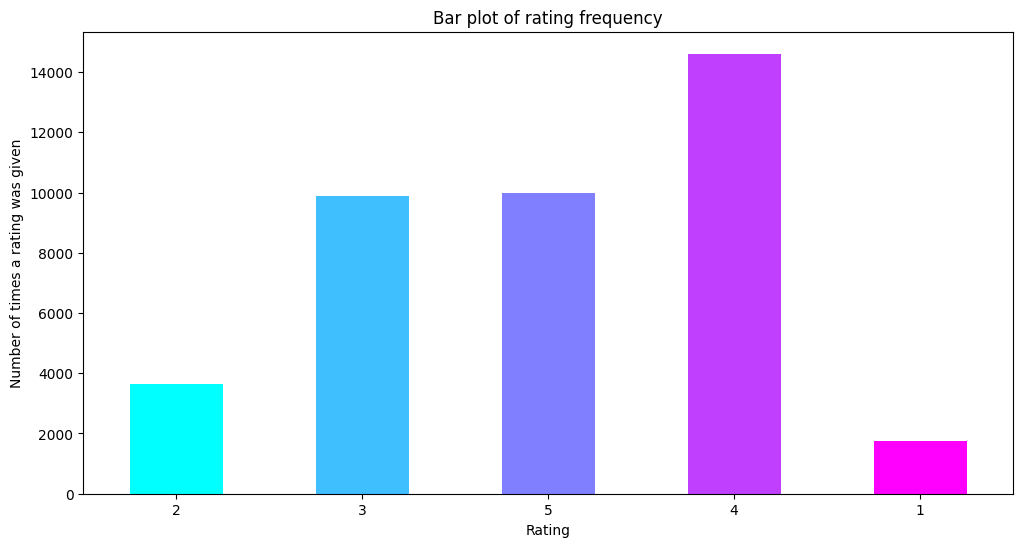

Total number of users watched this Genre:  39895
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Drama . Recommendations based on top average ratings.
                                                     rating
movie title                                                
Aiqing wansui (1994)                               5.000000
Saint of Fort Washington, The (1993)               5.000000
Prefontaine (1997)                                 5.000000
Entertaining Angels: The Dorothy Day Story (1996)  5.000000
They Made Me a Criminal (1939)                     5.000000
Someone Else's America (1995)                      5.000000
Pather Panchali (1955)                             4.625000
Anna (1996)                                        4.500000
Some Mother's Son (1996)                           4.500000
Schindler's List (1993)                            4.466443
****************************     ******************************     ***

In [151]:
genre_input = input("Enter the genre: ")
recommendations_genre(genre_input)

Enter the genre: Romance
****************************     ****** GENRE:  Romance  ******     ******************************
    


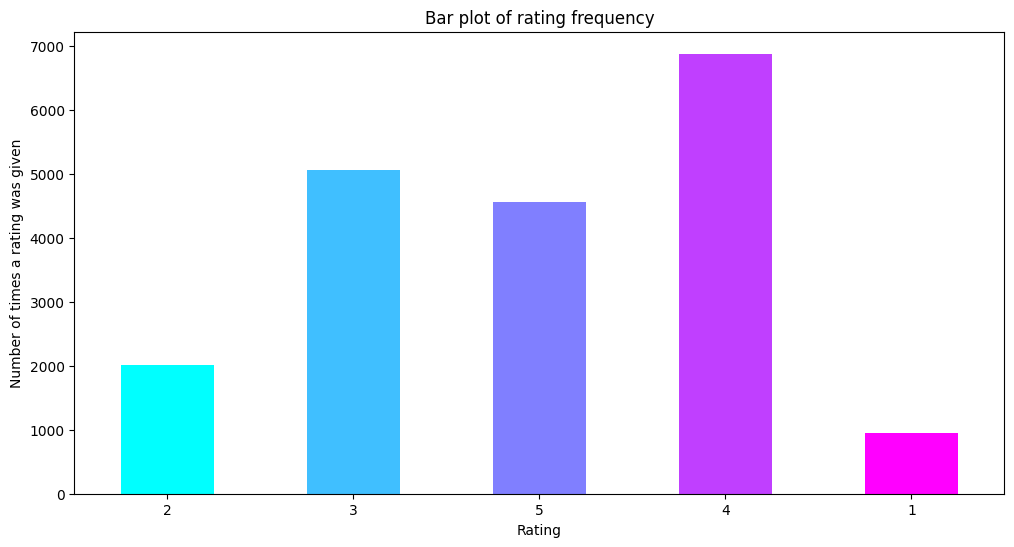

Total number of users watched this Genre:  19461
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Romance . Recommendations based on top average ratings.
                                   rating
movie title                              
Casablanca (1942)                4.456790
Star Wars (1977)                 4.358491
Titanic (1997)                   4.245714
Empire Strikes Back, The (1980)  4.204360
Affair to Remember, An (1957)    4.192308
African Queen, The (1951)        4.184211
Cinema Paradiso (1988)           4.173554
Princess Bride, The (1987)       4.172840
Notorious (1946)                 4.115385
Philadelphia Story, The (1940)   4.115385
****************************     ******************************     ******************************
These are the most popular movies which can be recommended to a new user in Romance genre. Recommendations based on Popularity
                       movie title  Number of Users watched

In [152]:
genre_input = input("Enter the genre: ")
recommendations_genre(genre_input)